# 01_preparation.ipynb

## 🧠 Chargement et aperçu des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import joblib

In [2]:
# 🔹 Définir le chemin du fichier
DATA_DIR = "C:\\Users\\moussa.aouinane\\Documents\\Ecom\\Score Churn Model\\data"
df = pd.read_csv(f"{DATA_DIR}\\customers_data.csv")

# 🔹 Aperçu rapide
print("📊 Dimensions :", df.shape)
df.head()
df.info()
df.describe()

📊 Dimensions : (5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   objec

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


## 🔍 Analyse des valeurs manquantes

🔍 Total missing values per column:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

📊 Pourcentage de valeurs manquantes par colonne :
Tenure                         4.69
WarehouseToHome                4.46
HourSpendOnApp                 4.53
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
dtype: float64

📌 Total missing values: 1856 (32.97%)


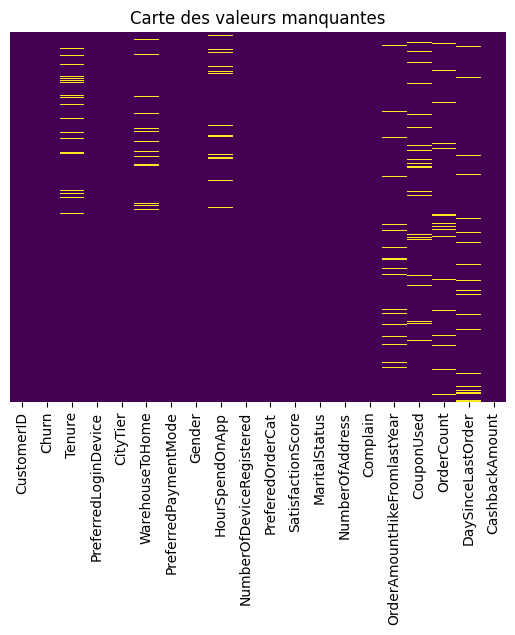

In [3]:
# 🔹 Total par colonne
total_na = df.isnull().sum()
percent_na = (total_na / df.shape[0]) * 100

print("🔍 Total missing values per column:")
print(total_na[total_na > 0])

print("\n📊 Pourcentage de valeurs manquantes par colonne :")
print(percent_na[percent_na > 0].round(2))

# 🔹 Total global
total_missing_values = total_na.sum()
global_percent = (total_missing_values / (df.shape[0])) * 100
print(f"\n📌 Total missing values: {total_missing_values} ({round(global_percent, 2)}%)")

# 🔹 Heatmap
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()

## 🧹 Nettoyage des données

In [4]:
# 🔹 Remplissage intelligent des valeurs manquantes
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if np.issubdtype(df[col].dtype, np.number):
            val = int(round(df[col].median())) if df[col].dropna().apply(float.is_integer).all() else df[col].median()
            df[col].fillna(val, inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Vérification finale des NaN :", df.isnull().sum().sum(), "valeurs manquantes restantes")

## 🗑️ Nettoyage des catégories et colonnes inutiles
# 🔹 Supprimer la colonne inutile
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)

# 🔹 Afficher les colonnes de type 'object'
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("🔠 Colonnes catégorielles :", cat_cols)
for col in cat_cols:
    print(f"\n📌 Colonne : {col}")
    print(f"Nombre de valeurs uniques : {df[col].nunique()}")
    print("Valeurs uniques :", df[col].unique())

# 🔹 Regroupement logique des valeurs similaires
cat_fix = {
    'PreferredLoginDevice': {'Phone': 'Mobile', 'Mobile Phone': 'Mobile'},
    'PreferredPaymentMode': {'CC': 'Credit Card', 'COD': 'Cash on Delivery', 'E wallet': 'E-Wallet'},
    'PreferedOrderCat': {'Mobile Phone': 'Mobile'}
}

for col, mapping in cat_fix.items():
    df[col] = df[col].replace(mapping)

print("----------------------------------")
print(df["PreferredLoginDevice"].value_counts())
print(df["PreferredPaymentMode"].value_counts())
print(df["PreferedOrderCat"].value_counts())

✅ Vérification finale des NaN : 0 valeurs manquantes restantes
🔠 Colonnes catégorielles : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

📌 Colonne : PreferredLoginDevice
Nombre de valeurs uniques : 3
Valeurs uniques : ['Mobile Phone' 'Phone' 'Computer']

📌 Colonne : PreferredPaymentMode
Nombre de valeurs uniques : 7
Valeurs uniques : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

📌 Colonne : Gender
Nombre de valeurs uniques : 2
Valeurs uniques : ['Female' 'Male']

📌 Colonne : PreferedOrderCat
Nombre de valeurs uniques : 6
Valeurs uniques : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

📌 Colonne : MaritalStatus
Nombre de valeurs uniques : 3
Valeurs uniques : ['Single' 'Divorced' 'Married']
----------------------------------
PreferredLoginDevice
Mobile      3996
Computer    1634
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E-Wa

C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\4247313842.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val, inplace=True)
C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\4247313842.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

## 📈 Visualisation des variables numériques

C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\4017670788.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=std_devs.values, y=std_devs.index, palette="Blues_d")
C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\4017670788.py:18: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\moussa.aouinane\Documents\Ecom\Score Churn Model\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


📐 Écart-type des variables numériques :
CashbackAmount                 49.193869
Tenure                          8.357951
WarehouseToHome                 8.345961
OrderAmountHikeFromlastYear     3.591058
DaySinceLastOrder               3.570626
OrderCount                      2.879248
NumberOfAddress                 2.583586
CouponUsed                      1.857640
SatisfactionScore               1.380194
NumberOfDeviceRegistered        1.023999
CityTier                        0.915389
HourSpendOnApp                  0.705528
Complain                        0.451408
dtype: float64


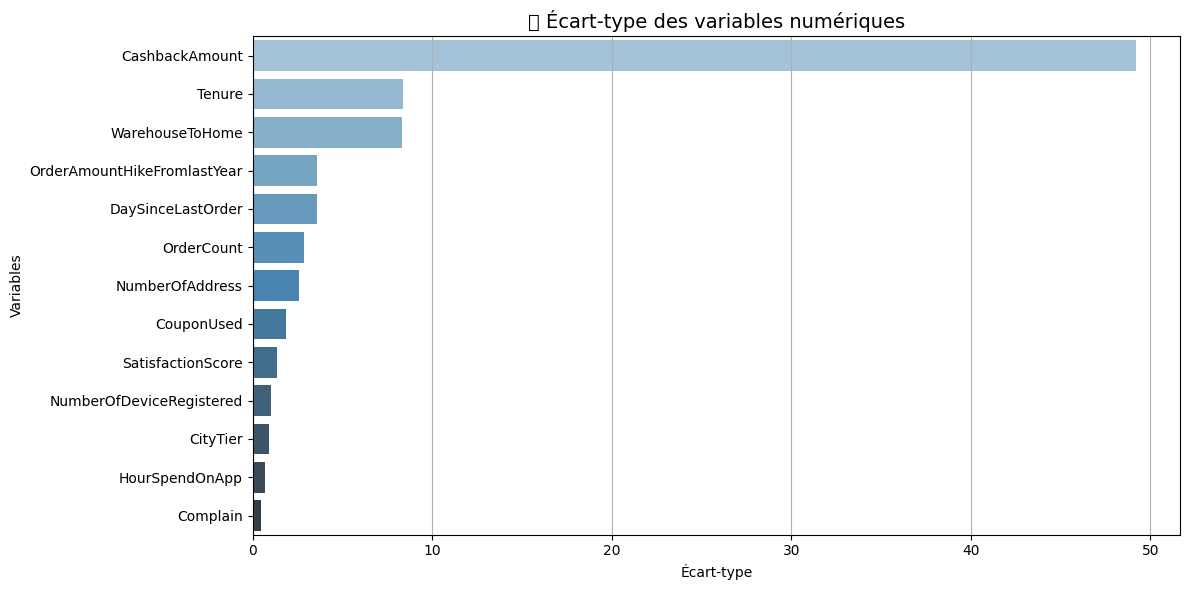

In [5]:
# 🔹 Identification des colonnes numériques
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'Churn']

# 🔹 Calcul de l'écart-type
std_devs = df[num_cols].std().sort_values(ascending=False)

# 🔹 Affichage texte
print("📐 Écart-type des variables numériques :")
print(std_devs)

# 🔹 Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=std_devs.values, y=std_devs.index, palette="Blues_d")
plt.title("📐 Écart-type des variables numériques", fontsize=14)
plt.xlabel("Écart-type")
plt.ylabel("Variables")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\2486928979.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\2486928979.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
C:\Users\moussa.aouinane\AppData\Local\Temp\ipykernel_3924\2486928979.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
C:\Users\moussa.aouinane\AppData\Local\Temp\ipyke

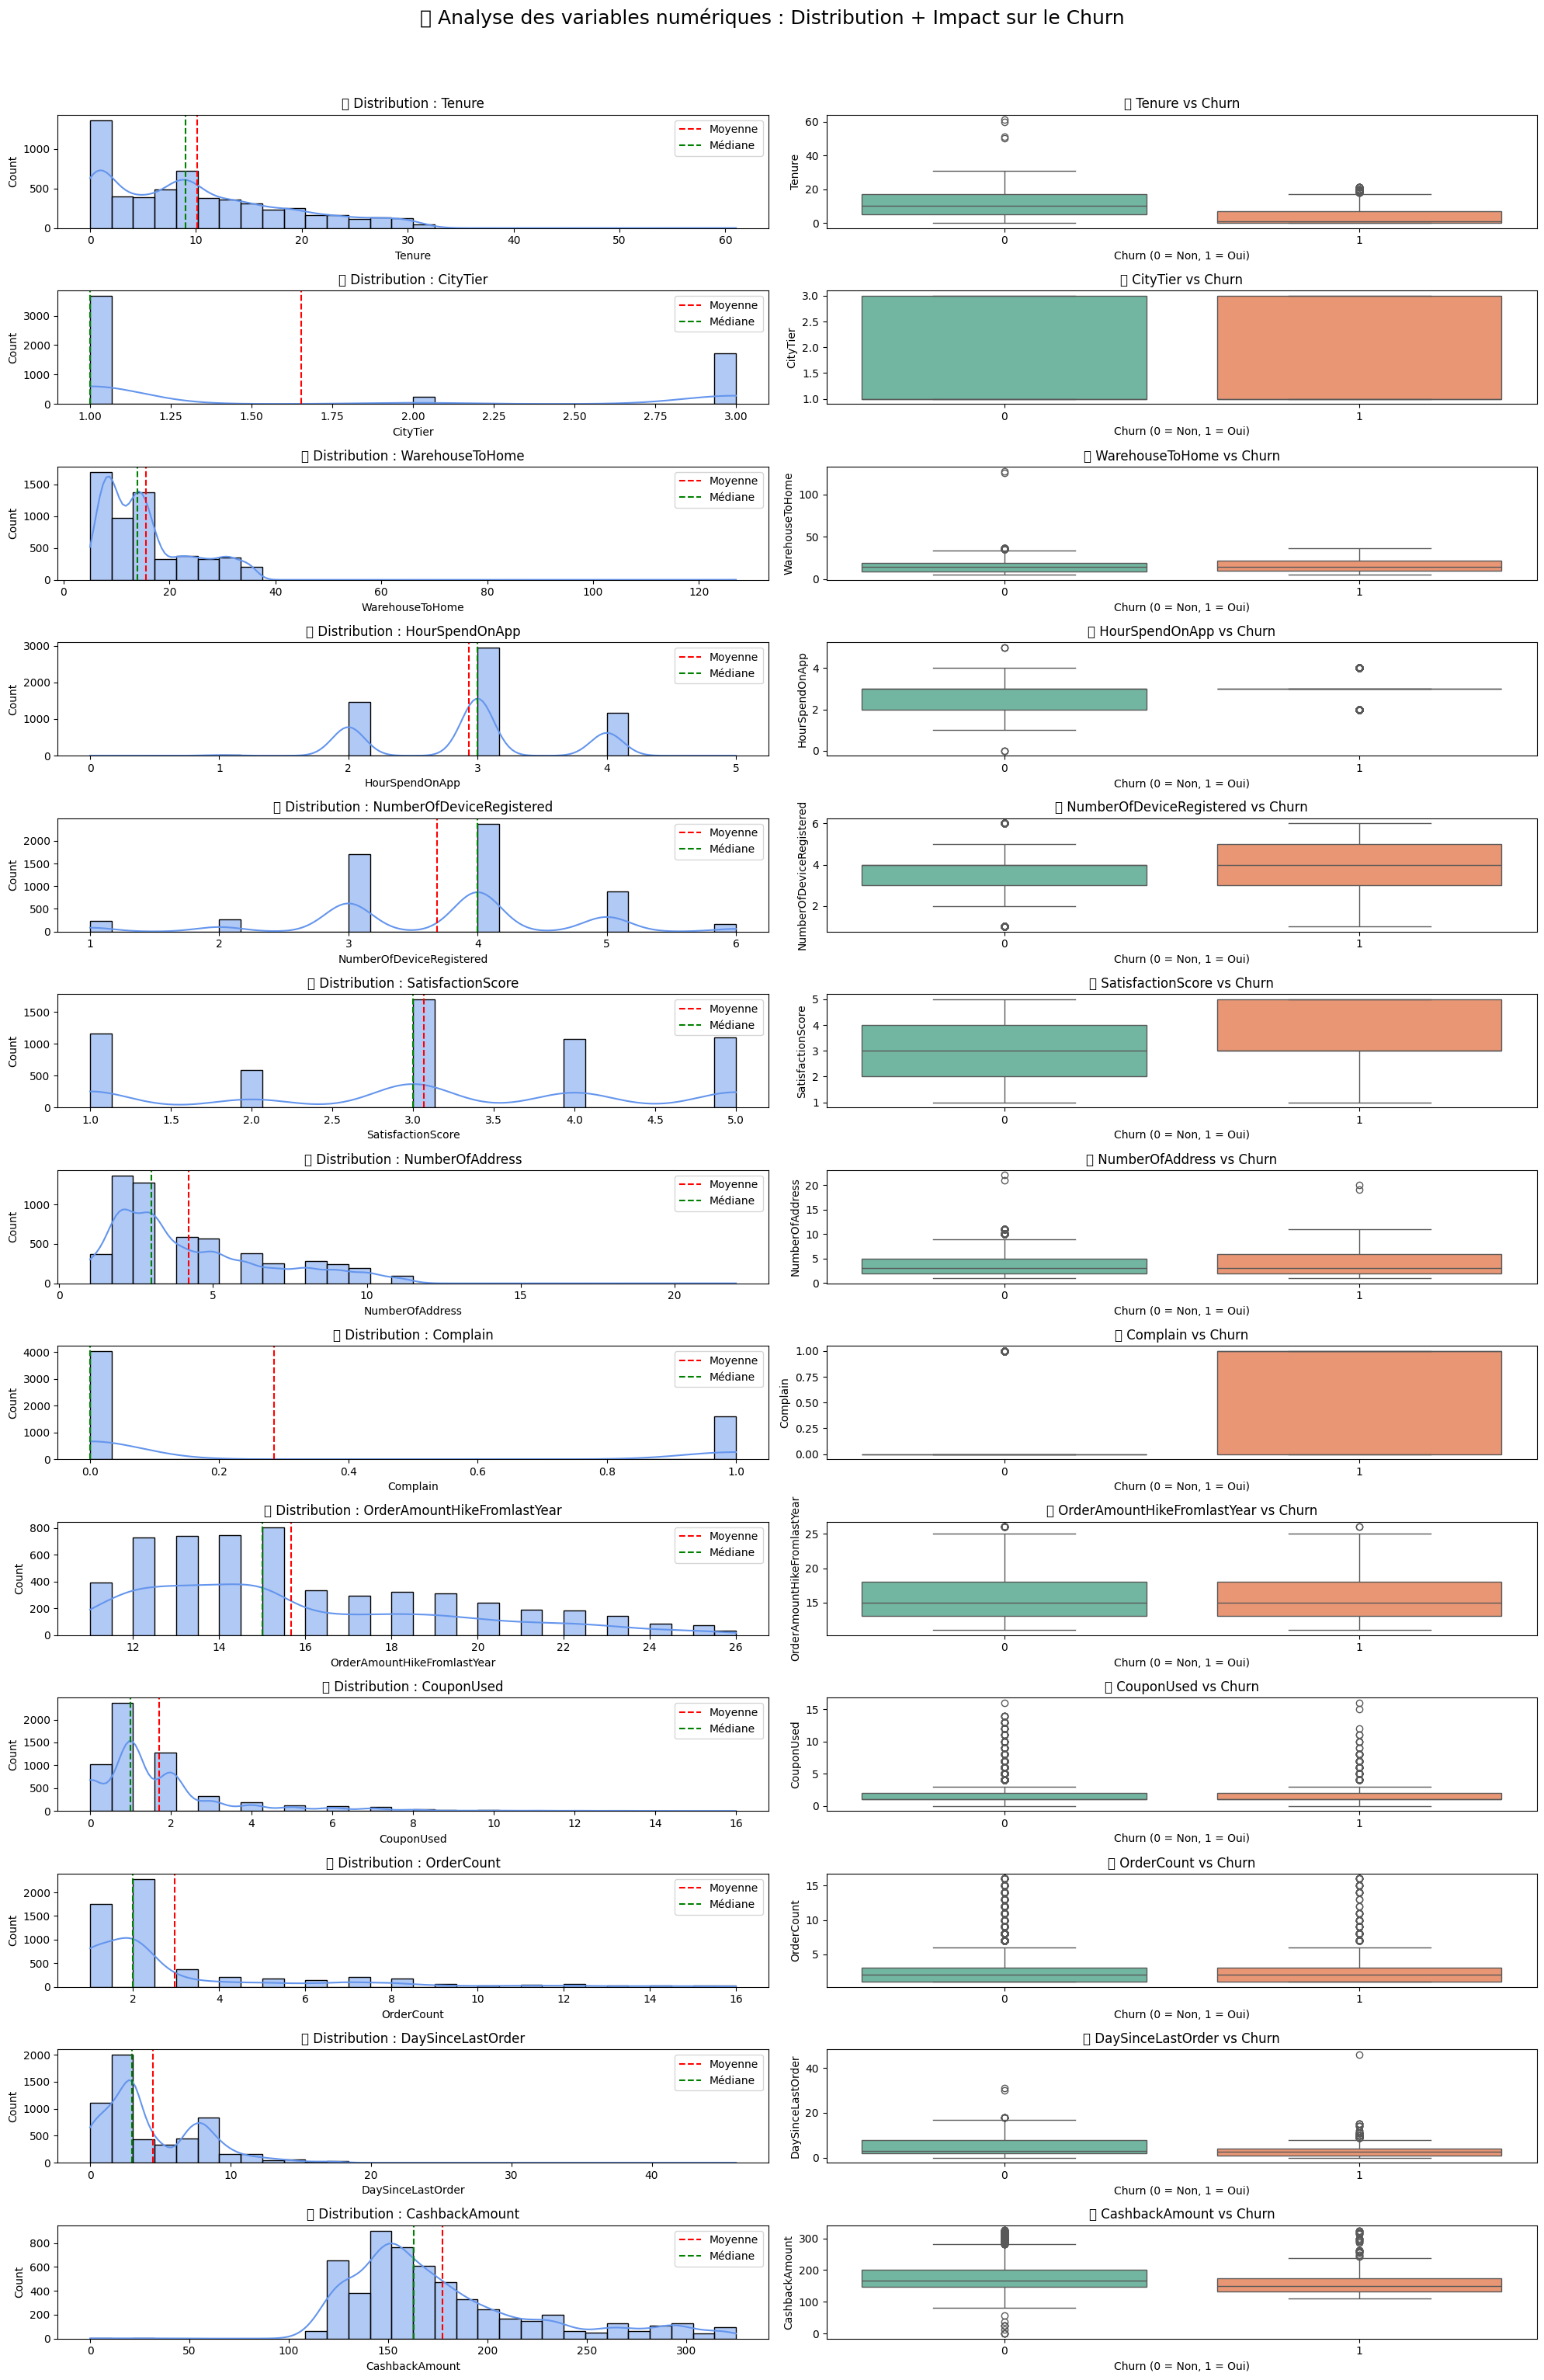

In [6]:
# 🔍 Visualisation combinée : histogrammes + boxplots
plt.figure(figsize=(20, 30))

for i, col in enumerate(num_cols, 1):
    # Histogramme avec courbe de densité
    plt.subplot(len(num_cols), 2, 2*i - 1)
    sns.histplot(df[col], kde=True, bins=30, color='cornflowerblue')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Moyenne')
    plt.axvline(df[col].median(), color='green', linestyle='--', label='Médiane')
    plt.title(f'📊 Distribution : {col}')
    plt.xlabel(col)
    plt.legend()

    # Boxplot avec Churn
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f'📦 {col} vs Churn')
    plt.xlabel("Churn (0 = Non, 1 = Oui)")
    plt.ylabel(col)

plt.suptitle("🎯 Analyse des variables numériques : Distribution + Impact sur le Churn", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## 📊 Analyse exploratoire des variables explicatives du churn

1. **Tenure** (ancienneté)

📉 **Distribution** : très asymétrique à droite (beaucoup de nouveaux clients).  
📦 **Boxplot** : les clients churnés ont une ancienneté significativement plus faible.  
✅ **Interprétation** : Les nouveaux clients sont plus à risque de churn.

2. **CityTier**

📉 **Distribution** : la plupart des clients sont dans les villes Tier 1.  
📦 **Boxplot** : pas de différence majeure visuelle entre churn/non churn.  
❗ **Interprétation** : Variable probablement peu prédictive seule.

3. **WarehouseToHome** (distance entrepôt-maison)

📉 **Distribution** : majorité autour de 20-30 km, avec quelques valeurs extrêmes.  
📦 **Boxplot** : churn légèrement plus élevé pour les grandes distances.  
✅ **Interprétation** : Une grande distance pourrait ralentir la livraison → impact négatif.

4. **HourSpendOnApp** (temps passé sur l’app)

📉 **Distribution** : centrée autour de 2.5h.  
📦 **Boxplot** : les churners passent en moyenne moins de temps sur l’app.  
✅ **Interprétation** : Le temps passé sur l’app est un fort indicateur d’engagement.

5. **NumberOfDeviceRegistered**

📉 **Distribution** : concentrée sur 1-2 appareils.  
📦 **Boxplot** : plus d’appareils enregistrés = moins de churn.  
✅ **Interprétation** : Plusieurs appareils = utilisation fréquente / fidélité.

6. **SatisfactionScore**

📉 **Distribution** : score majoritairement entre 2 et 4.  
📦 **Boxplot** : churn plus élevé pour les scores bas.  
✅ **Interprétation** : Très forte corrélation inverse avec le churn. Variable très utile.

7. **NumberOfAddress**

📉 **Distribution** : valeurs concentrées autour de 1-2.  
📦 **Boxplot** : peu de différence nette entre churn/non-churn.  
🔸 **Interprétation** : Peut être combinée avec d’autres variables.

8. **Complain**

📉 **Distribution** : variable binaire (0 ou 1).  
📦 **Boxplot** : les clients qui se plaignent churnent beaucoup plus.  
✅ **Interprétation** : Indicateur fort d’insatisfaction → prédicteur de churn.

9. **OrderAmountHikeFromlastYear**

📉 **Distribution** : forte asymétrie, la majorité augmente peu.  
📦 **Boxplot** : les churners ont moins augmenté leurs dépenses.  
✅ **Interprétation** : Une croissance des achats diminue le risque de churn.

10. **CouponUsed**

📉 **Distribution** : en cloche autour de 1-2.  
📦 **Boxplot** : les non-churners utilisent plus souvent des coupons.  
✅ **Interprétation** : L’utilisation de promotions = engagement accru.

11. **OrderCount**

📉 **Distribution** : exponentielle inversée.  
📦 **Boxplot** : les clients churnés commandent moins.  
✅ **Interprétation** : Nombre de commandes = comportement actif = fidélité.

12. **DaySinceLastOrder**

📉 **Distribution** : pic massif à gauche → beaucoup de clients récents.  
📦 **Boxplot** : les churners ont plus de jours depuis la dernière commande.  
✅ **Interprétation** : Très bon prédicteur → plus la dernière commande est ancienne, plus le risque de churn est élevé.

13. **CashbackAmount**

📉 **Distribution** : étalée, avec certains pics.  
📦 **Boxplot** : les churners reçoivent moins de cashback.  
✅ **Interprétation** : Récompenses financières = levier de rétention.

## 🔢 Encodage + Séparation X / y

In [7]:
# 🔹 Séparation X / y
y = df['Churn']
X = df.drop(columns=['Churn'])

# **NOUVEAU : Sauvegarder les noms des colonnes originales de X**
# Ces noms seront utilisés dans le notebook d'exploitation pour s'assurer
# que le DataFrame créé à partir des entrées Gradio a les bonnes colonnes et dans le bon ordre.
X_original_columns = X.columns.tolist()

# S'assurer que le dossier 'models' existe
os.makedirs("../models", exist_ok=True)
joblib.dump(X_original_columns, "../models/X_original_columns.pkl")
print("💾 Noms des colonnes originales de X sauvegardés.")

# 🔹 Colonnes catégorielles (y compris celles codées en numérique mais catégoriques)
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
            'PreferedOrderCat', 'MaritalStatus', 'CityTier', 'Complain']

print("🔠 Colonnes catégorielles :", cat_cols)

# 🔹 Colonnes numériques = le reste
num_cols = [col for col in X.columns if col not in cat_cols]

# 🔹 Forcer le type "category"
for col in cat_cols:
    X[col] = X[col].astype('category')

# 🔢 Vérifions les types
print("\n📋 Types de colonnes après conversion :")
print(X.dtypes[cat_cols])

# 🔹 Pipelines
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols)
])

# 🔹 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔹 Encodage effectif
X_train_processed_array = preprocessor.fit_transform(X_train)
X_test_processed_array = preprocessor.transform(X_test)

# 🔹 Récupérer noms de colonnes encodées pour créer des DataFrames (optionnel mais bon pour vérification)
try:
    ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
    cat_feature_names = ohe.get_feature_names_out(cat_cols) #
    all_feature_names = list(cat_feature_names) + num_cols #
except AttributeError: # Pour les anciennes versions de scikit-learn
    # Tenter une méthode alternative ou simplement utiliser des noms génériques
    # Cette partie est surtout pour l'inspection, le modèle s'attend à l'array
    print("Attention : Impossible de récupérer les noms des features encodées automatiquement (version sklearn ?).")
    all_feature_names = None


# 🔹 Récupérer noms de colonnes encodées
#ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
#cat_feature_names = ohe.get_feature_names_out(cat_cols)
#all_feature_names = list(cat_feature_names) + num_cols

# 🔹 Convertir en DataFrame (optionnel, mais X_train.csv et X_test.csv sont utilisés dans 02_modélisation)
if all_feature_names:
    X_train_processed = pd.DataFrame(X_train_processed_array.toarray() if hasattr(X_train_processed_array, 'toarray') else X_train_processed_array, columns=all_feature_names) #
    X_test_processed = pd.DataFrame(X_test_processed_array.toarray() if hasattr(X_test_processed_array, 'toarray') else X_test_processed_array, columns=all_feature_names) #
else:
    # Si les noms ne peuvent pas être récupérés, on sauvegarde les arrays numpy
    # ou on crée des DataFrames avec des noms génériques (moins idéal pour l'inspection)
    # Pour la compatibilité avec votre notebook 02_modélisation qui lit des CSV,
    # il est préférable d'avoir les noms de colonnes.
    # Si ohe.get_feature_names_out échoue, vous devrez peut-être mettre à jour sklearn
    # ou trouver une méthode compatible avec votre version pour obtenir ces noms.
    # Pour l'instant, supposons que cela fonctionne pour correspondre à la création de X_train.csv
    if not all_feature_names and X_train_processed_array is not None:
         X_train_processed = pd.DataFrame(X_train_processed_array.toarray() if hasattr(X_train_processed_array, 'toarray') else X_train_processed_array)
         X_test_processed = pd.DataFrame(X_test_processed_array.toarray() if hasattr(X_test_processed_array, 'toarray') else X_test_processed_array)
         print("Noms de features encodées non récupérés, DataFrames créés avec des index numériques pour les colonnes.")


# 🔹 Convertir en DataFrame
#X_train_df = pd.DataFrame(X_train_encoded.toarray() if hasattr(X_train_encoded, 'toarray') else X_train_encoded, columns=all_feature_names)
#X_test_df = pd.DataFrame(X_test_encoded.toarray() if hasattr(X_test_encoded, 'toarray') else X_test_encoded, columns=all_feature_names)

# 🔹 Vérification
print("✅ Train shape:", X_train_processed.shape, y_train.shape)
print("✅ Test shape:", X_test_processed.shape, y_test.shape)
print("\n🧾 Aperçu des données encodées :")
print(X_train_processed.head())

# 🔹 Sauvegarde
output_path = DATA_DIR
#os.makedirs(output_path, exist_ok=True)

X_train_processed.to_csv(f"{output_path}\\X_train.csv", index=False)
X_test_processed.to_csv(f"{output_path}\\X_test.csv", index=False)
y_train.to_csv(f"{output_path}\\y_train.csv", index=False)
y_test.to_csv(f"{output_path}\\y_test.csv", index=False)

print("💾 Données encodées sauvegardées dans le dossier /data")


# **NOUVEAU : Sauvegarder le preprocessor**
# Le dossier ../models doit exister ou être créé
models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)
joblib.dump(preprocessor, f"{models_dir}/churn_preprocessor.pkl")
print(f"💾 Preprocessor sauvegardé dans {models_dir}/churn_preprocessor.pkl")

# **NOUVEAU (Optionnel mais recommandé) : Sauvegarder les noms des colonnes après preprocessing**
# Cela peut être utile si on charge directement X_train.csv et qu'on veut les noms de colonnes
if all_feature_names:
    joblib.dump(all_feature_names, f"{models_dir}/processed_feature_names.pkl")
    print(f"💾 Noms des features encodées sauvegardés dans {models_dir}/processed_feature_names.pkl")

💾 Noms des colonnes originales de X sauvegardés.
🔠 Colonnes catégorielles : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CityTier', 'Complain']

📋 Types de colonnes après conversion :
PreferredLoginDevice    category
PreferredPaymentMode    category
Gender                  category
PreferedOrderCat        category
MaritalStatus           category
CityTier                category
Complain                category
dtype: object
✅ Train shape: (4504, 26) (4504,)
✅ Test shape: (1126, 26) (1126,)

🧾 Aperçu des données encodées :
   PreferredLoginDevice_Mobile  PreferredPaymentMode_Credit Card  \
0                          0.0                               1.0   
1                          0.0                               0.0   
2                          1.0                               0.0   
3                          1.0                               0.0   
4                          0.0                               0.0   

   Preferr